/tmp/ipykernel_3007804/1011708623.py:81: UserWarning: Glyph 50616 (\N{HANGUL SYLLABLE EON}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3007804/1011708623.py:81: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3007804/1011708623.py:81: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3007804/1011708623.py:81: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3007804/1011708623.py:81: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3007804/1011708623.py:81: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3007804/1011708623.py:81: UserWarning: Glyph 45937 (\N{HANGUL SYLLABLE DEG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3007804/101

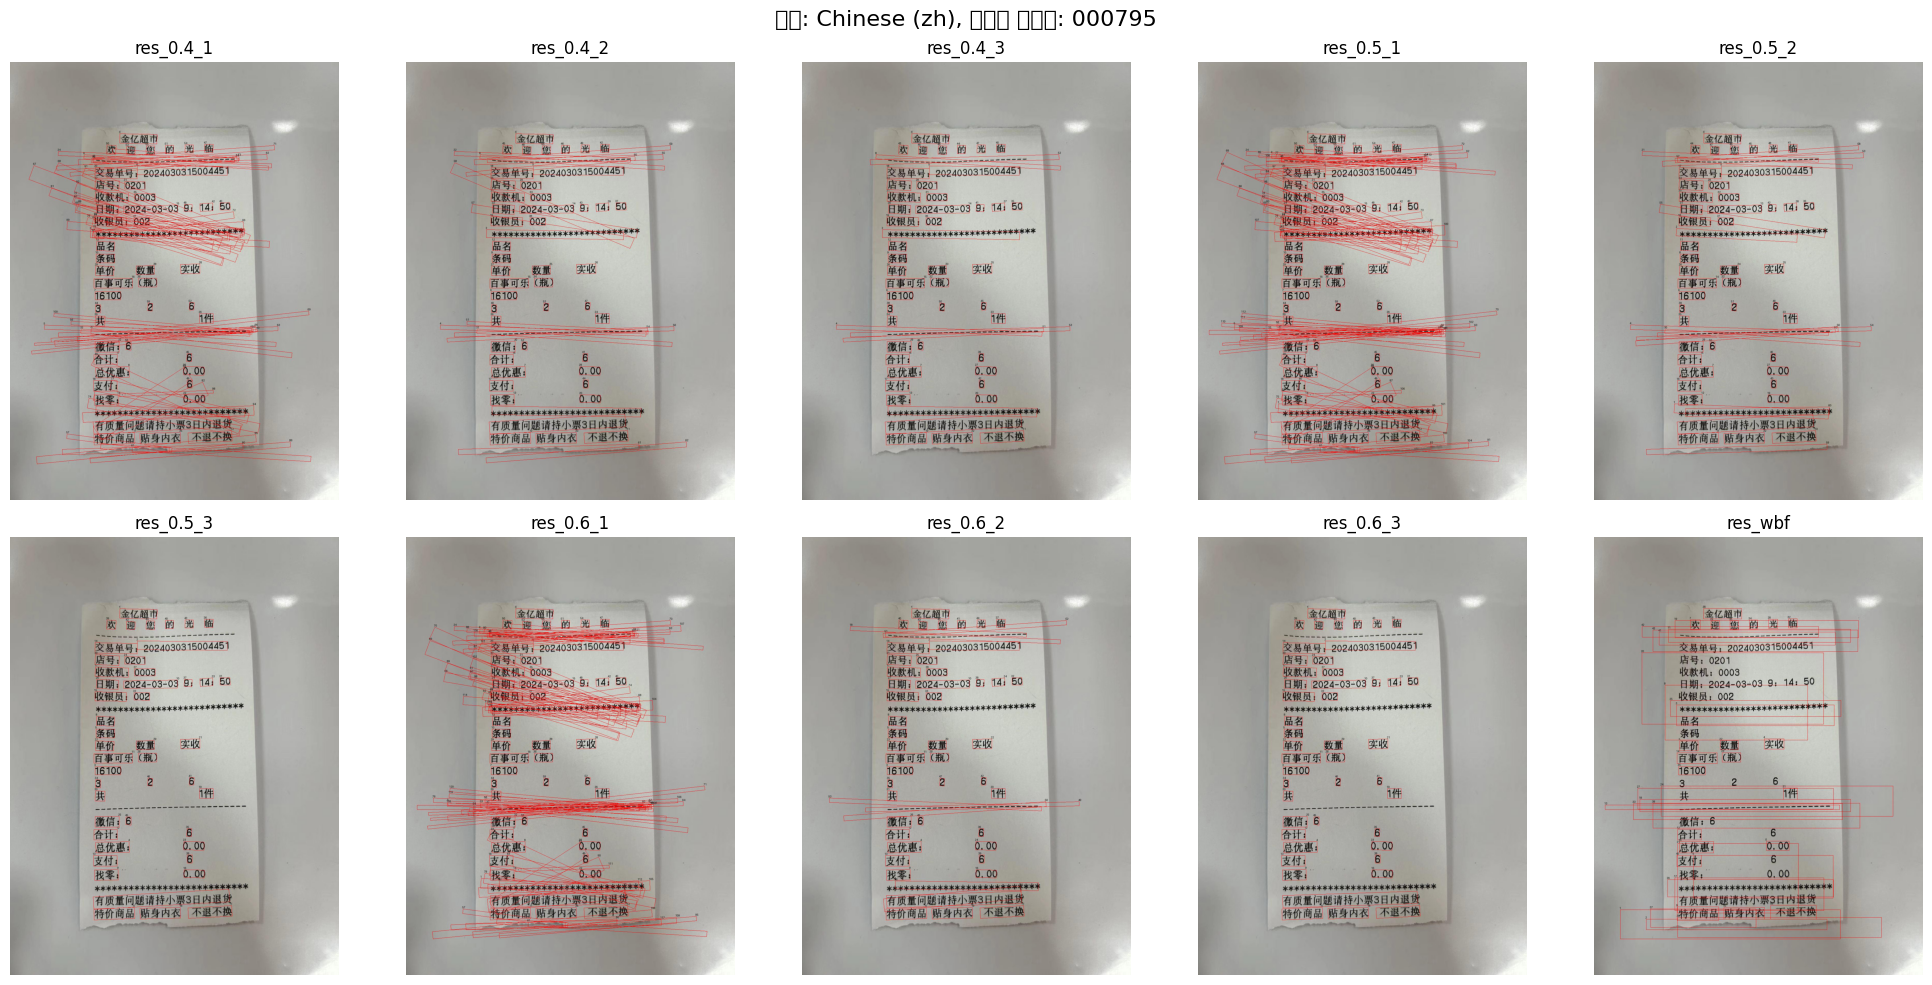

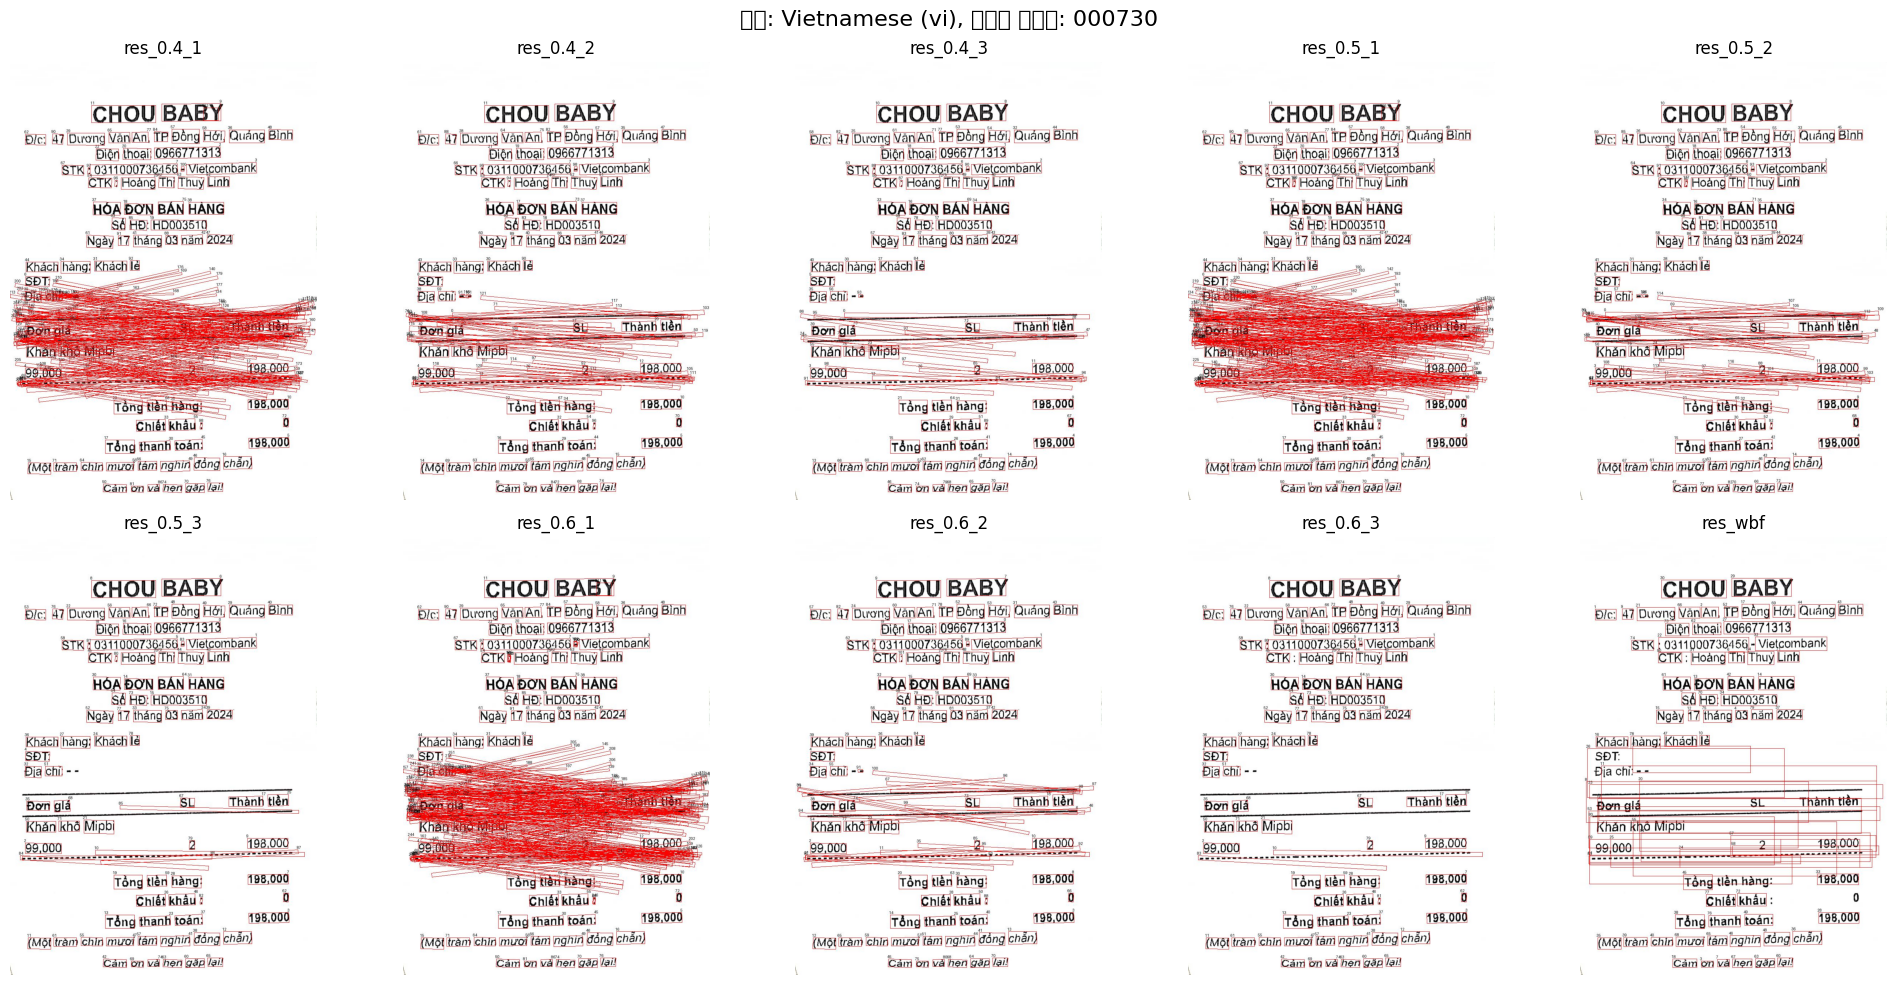

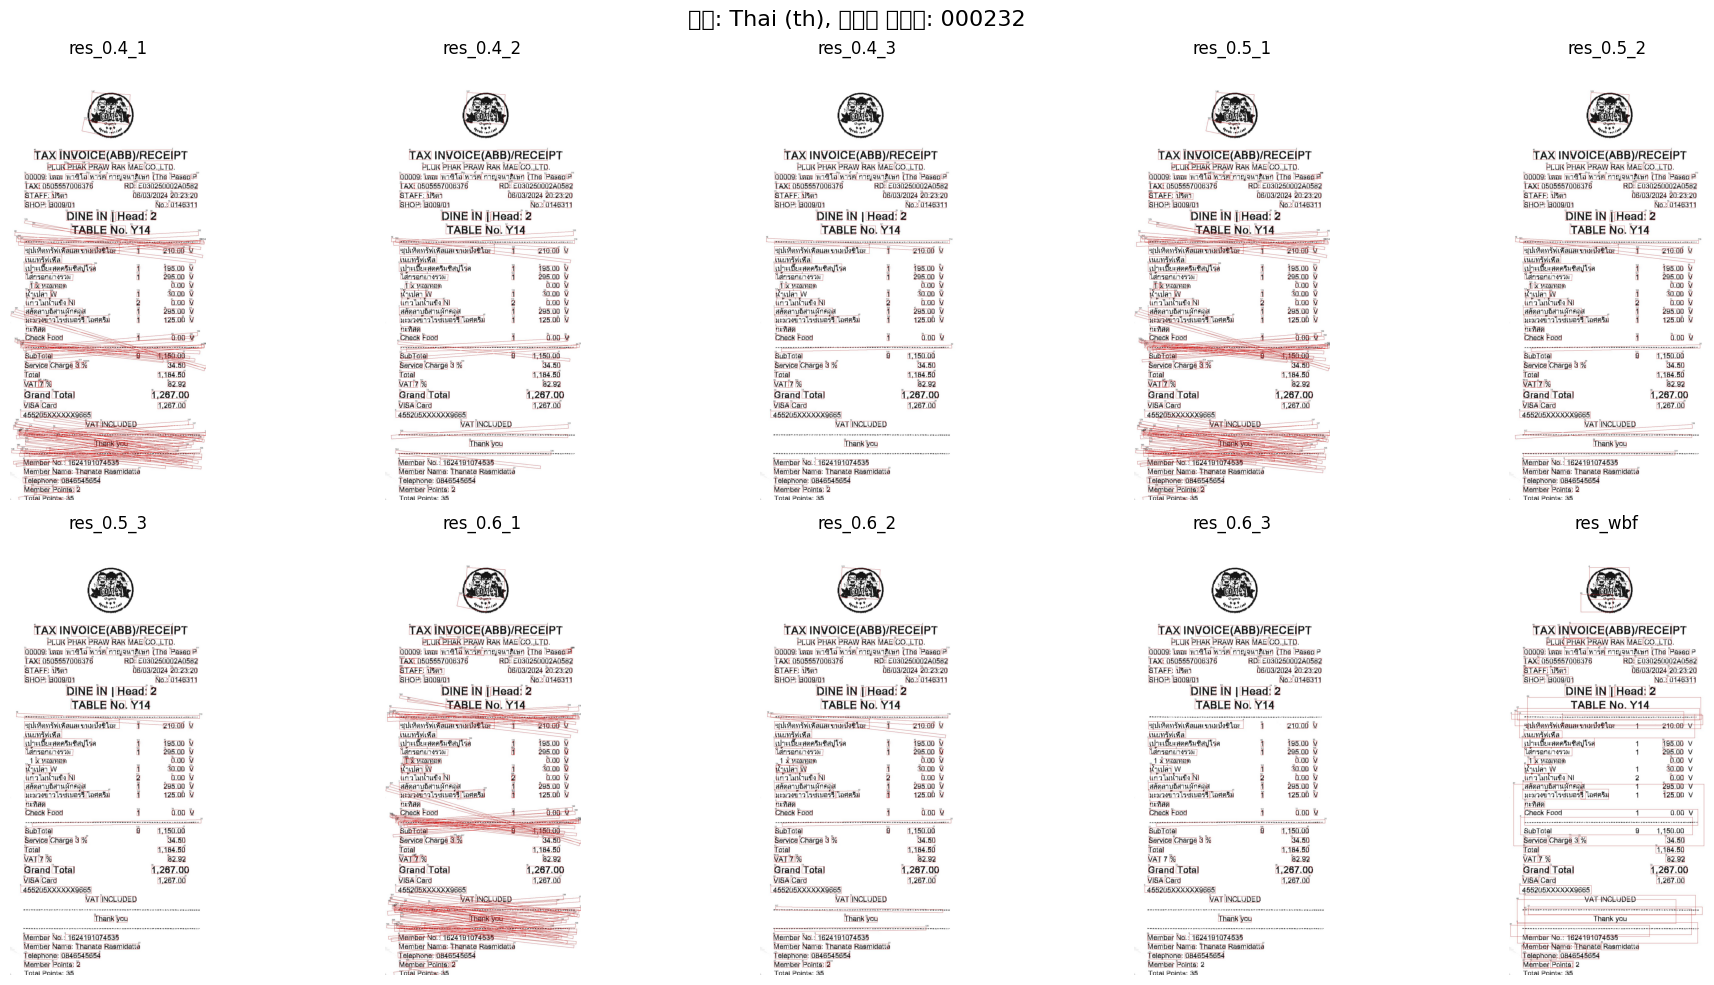

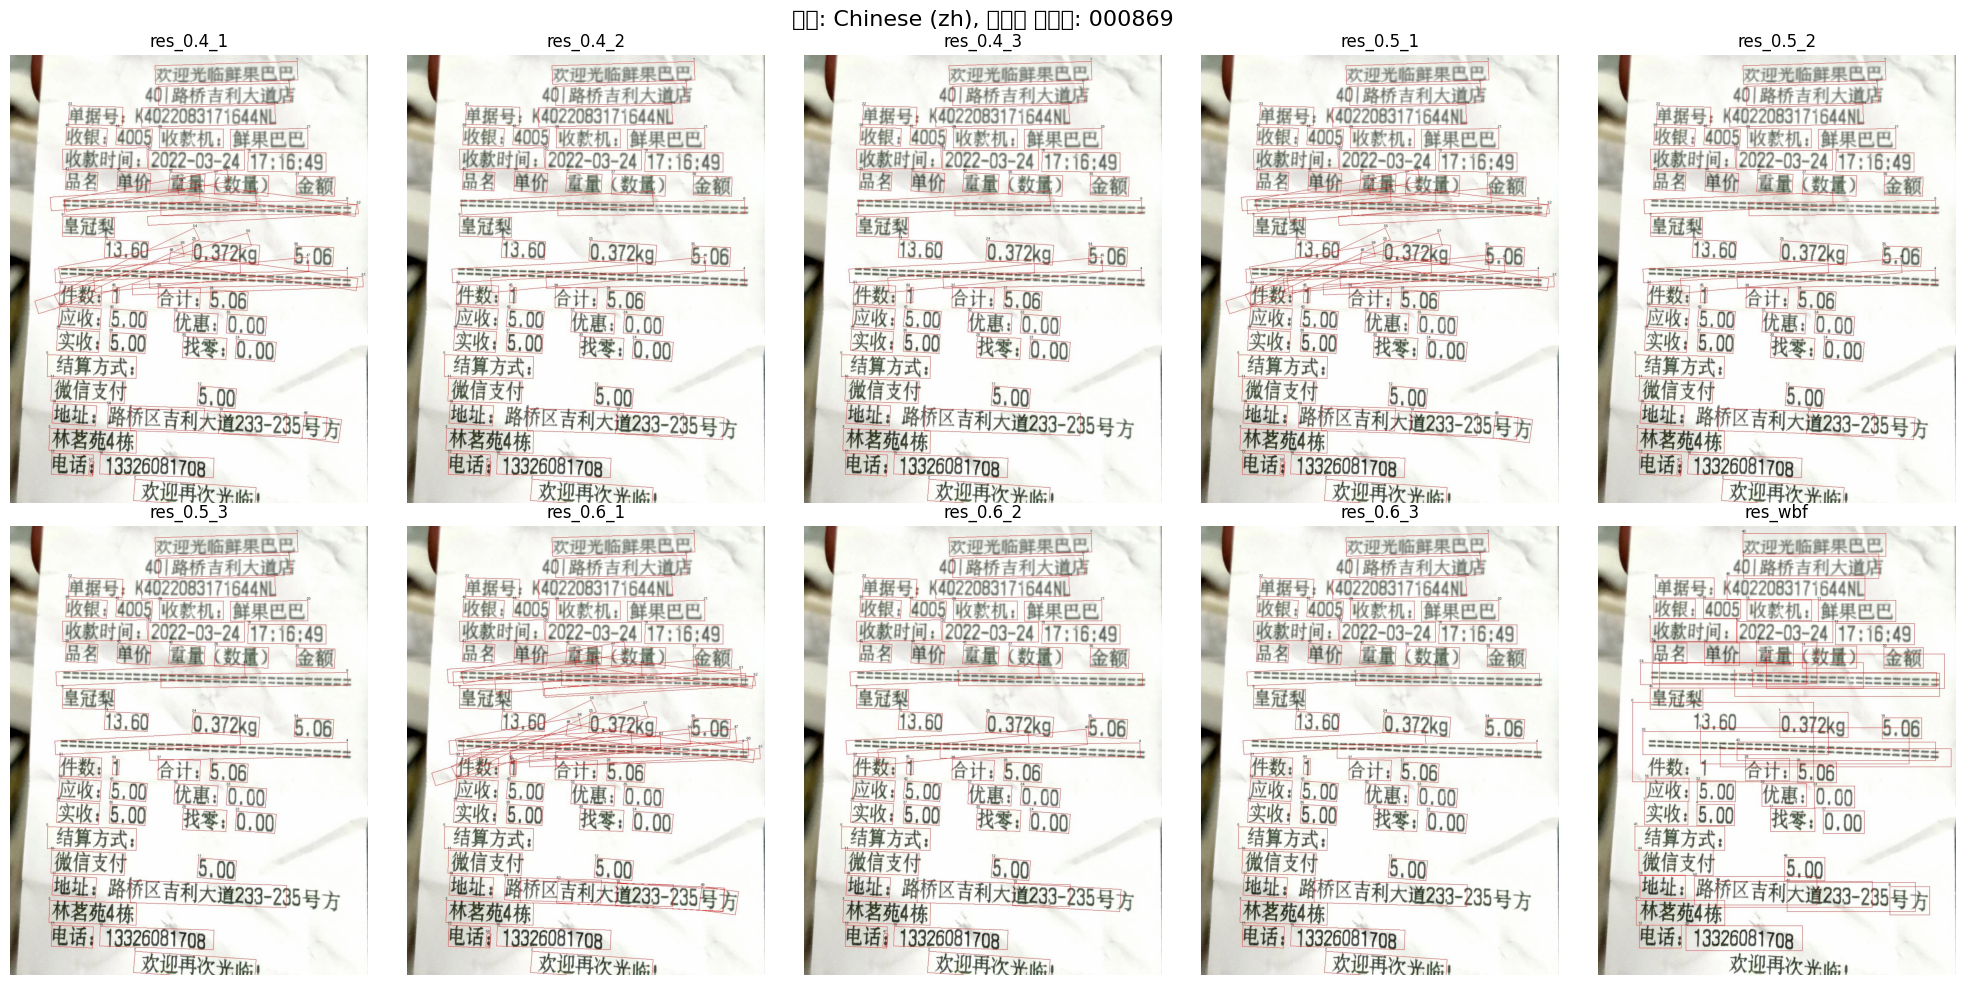

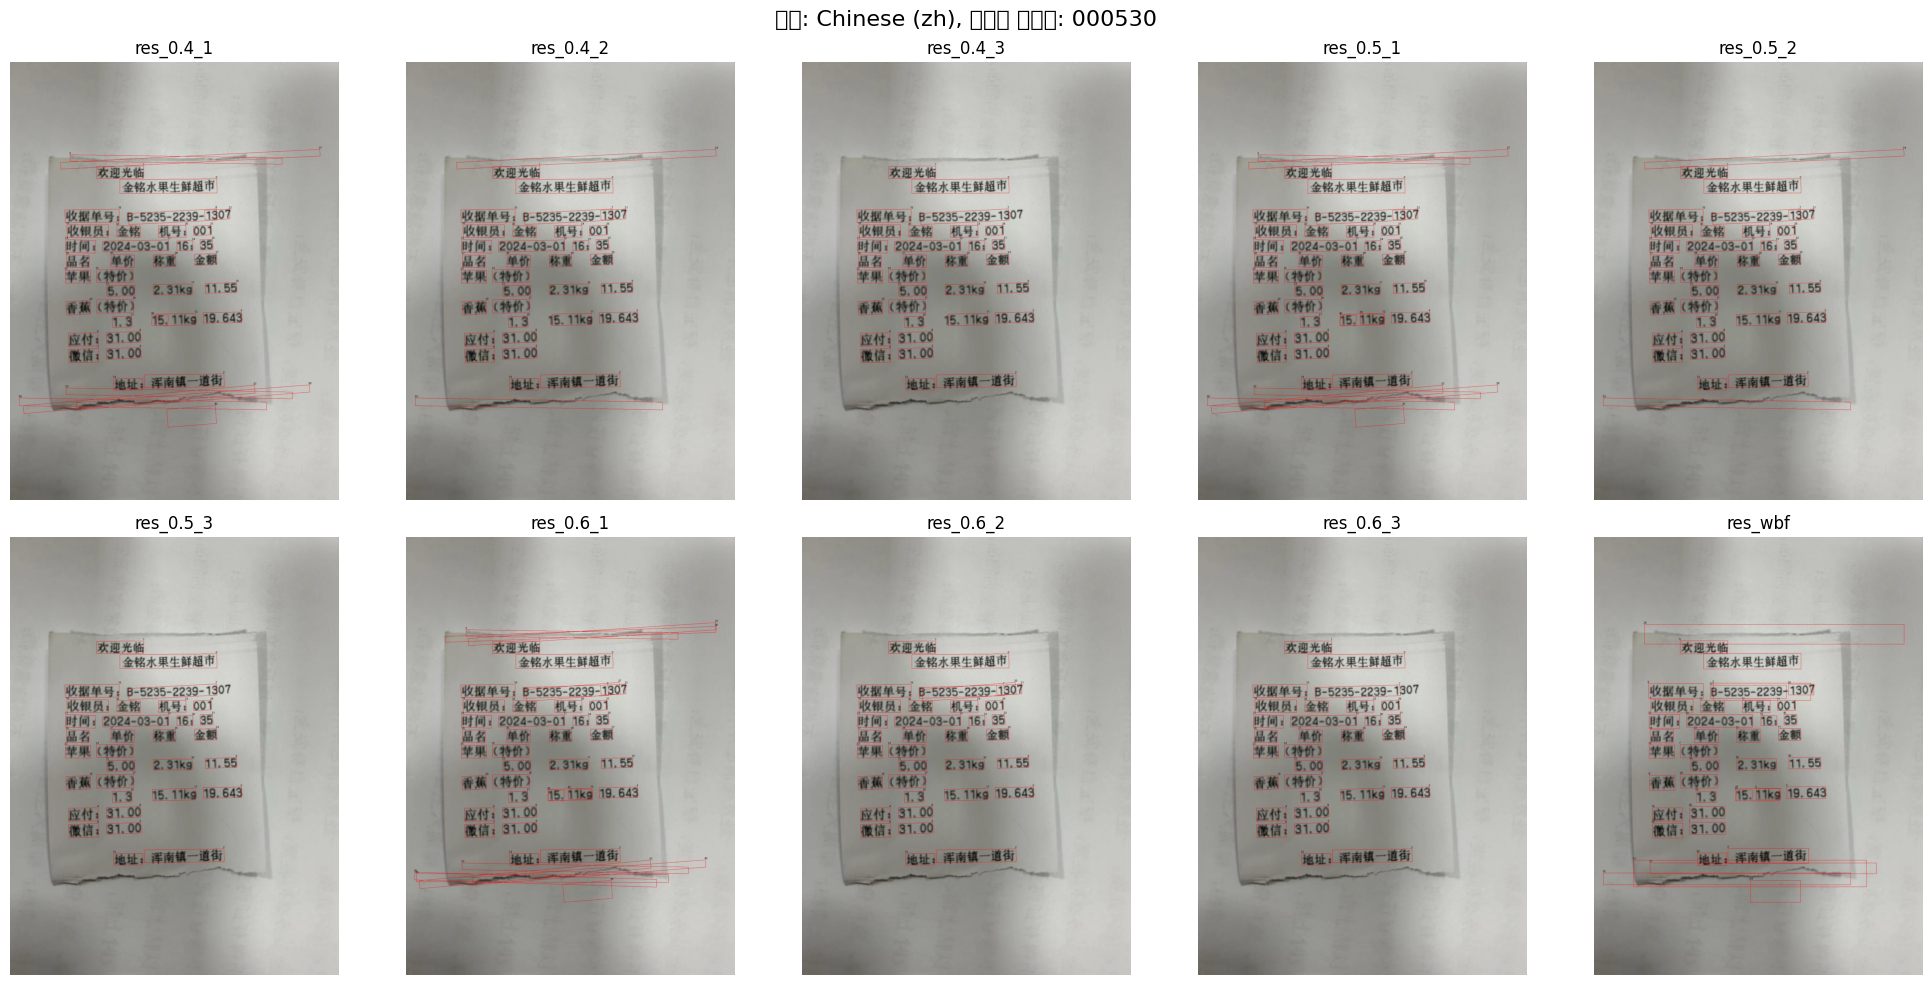

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

# 기본 디렉토리 설정
base_dir = '/home/naring/workplace/code/vis'
folders = [
    'res_0.4_1', 'res_0.4_2', 'res_0.4_3',
    'res_0.5_1', 'res_0.5_2', 'res_0.5_3',
    'res_0.6_1', 'res_0.6_2', 'res_0.6_3', 'res_wbf'
]

# 언어 코드 매핑
language_codes = {
    'ja': 'Japanese',
    'vi': 'Vietnamese',
    'th': 'Thai',
    'zh': 'Chinese'
}

# 파일 이름에서 언어 코드와 이미지 인덱스를 추출하는 함수
def parse_filename(filename):
    try:
        parts = filename.split('.')
        lang_code = parts[1]
        lang_name = language_codes.get(lang_code, 'Unknown')
        
        # 이미지 인덱스 추출
        # 예: 'extractor.ja.in_house.appen_000013_page0001.jpg'
        rest = '.'.join(parts[2:])  # 'in_house.appen_000013_page0001.jpg'
        # 'appen_' 이후의 문자열에서 이미지 인덱스 추출
        appen_part = rest.split('appen_')[1]
        image_index = appen_part.split('_')[0]  # '000013'
        
        return lang_code, lang_name, image_index
    except Exception as e:
        return None, None, None

# 이미지 딕셔너리 생성
image_dict = {}
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            lang_code, lang_name, image_index = parse_filename(filename)
            if lang_code and image_index:
                key = (lang_code, image_index)
                if key not in image_dict:
                    image_dict[key] = {}
                image_dict[key][folder] = os.path.join(folder_path, filename)

# 비교할 이미지 수 설정
num_images_to_compare = 5  # 필요에 따라 조정 가능

# 키 목록 생성 및 랜덤 선택
keys = list(image_dict.keys())
if len(keys) == 0:
    print("이미지가 없습니다.")
else:
    selected_keys = random.sample(keys, min(len(keys), num_images_to_compare))
    for key in selected_keys:
        lang_code, image_index = key
        lang_name = language_codes.get(lang_code, 'Unknown')
        images = image_dict[key]
        num_images = len(images)
        plt.figure(figsize=(20, 10))
        plt.suptitle(f"언어: {lang_name} ({lang_code}), 이미지 인덱스: {image_index}", fontsize=16)
        
        # 이미지 출력
        for i, (folder, filepath) in enumerate(sorted(images.items())):
            try:
                img = Image.open(filepath)
                plt.subplot(2, 5, i + 1)
                plt.imshow(img)
                plt.title(f"{folder}")
                plt.axis('off')
            except Exception as e:
                print(f"{filepath} 로딩 오류: {e}")
        
        plt.tight_layout()
        plt.show()
